# FISH - Pipeline - A Python notebook to simulate FISH data

```
Author: Luis U. Aguilera
Contact Info: luis.aguilera@colostate.edu

Copyright (c) 2021 Munsky Group 
Colorado State University 
Licensed under BSD 3-Clause License.
```

### Libraries

In [1]:
# Importing libraries
import sys
import pathlib
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Path to source directories

In [2]:
# Defining directories
current_dir = pathlib.Path().absolute()
fa_dir = current_dir.parents[0].joinpath('src')
# Importing fish_analyses module
sys.path.append(str(fa_dir))
import fish_analyses as fa


In [3]:
# initializing Microscope simulation 
cell_library_folder_path = current_dir.joinpath('cell_library')
list_library_cells, dataframe_cell_library, background_pixels_library = fa.MicroscopeSimulation().initialize(cell_library_folder_path)

___

# Function to simulate cell positions

In [4]:
image_size_Y_X = [5000,5000]
number_of_cells_in_simulation = 100
simulation_dataframe,complete_image_size_Z_Y_X = fa.MicroscopeSimulation().generate_simulated_positions(image_size_Y_X,number_of_cells_in_simulation,list_library_cells,dataframe_cell_library)
simulation_dataframe.tail()

,start_y_position,start_x_position,centroid_y,centroid_x,z_size,y_size,x_size,nucleus_area,number_of_spots,ts_size_0,ts_size_1,ts_size_2,ts_size_3,library_id
95,4096,3061,4145,3108,27,98,95,6724,296,55,0,0,0,41
96,4142,1223,4185,1268,27,86,90,5945,443,0,0,0,0,62
97,3366,4313,3424,4356,27,116,87,7048,279,96,0,0,0,82
98,3224,4277,3269,4315,27,90,76,4752,210,9,0,0,0,30
99,2902,2805,2948,2856,27,93,103,7173,278,67,0,0,0,74


# Generate simulation on demand

(960, 960, 2)


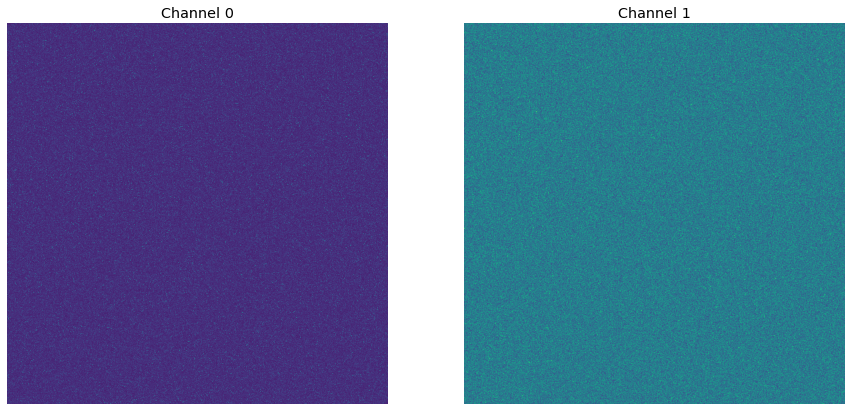

In [5]:
# Region to display
z_position = 0 #[-13:13]
y_position =  1200
x_position = 1200
x_size = 960
y_size = 960

simulated_image,dataframe_cells_in_image = fa.MicroscopeSimulation().make_simulated_image(z_position, y_position, x_position, x_size, y_size, complete_image_size_Z_Y_X, simulation_dataframe, list_library_cells, background_pixels_library)

# Plotting
number_color_channels = simulated_image.shape[2]
fig, ax = plt.subplots(1,number_color_channels, figsize=(15, 7))
# Plotting the heatmap of a section in the image
for i in range (number_color_channels):
    simulated_image_removed_extreme_values = fa.RemoveExtrema(simulated_image[:,:,i],min_percentile=0, max_percentile=99.9).remove_outliers()  #np.max(simulated_image[:,:,:,i],axis = 0)
    ax[i].imshow(simulated_image_removed_extreme_values);ax[i].set(title='Channel '+ str(i)); ax[i].axis('off');ax[i].grid(False)
plt.show()


In [6]:
dataframe_cells_in_image

""


300 2000
300 2000


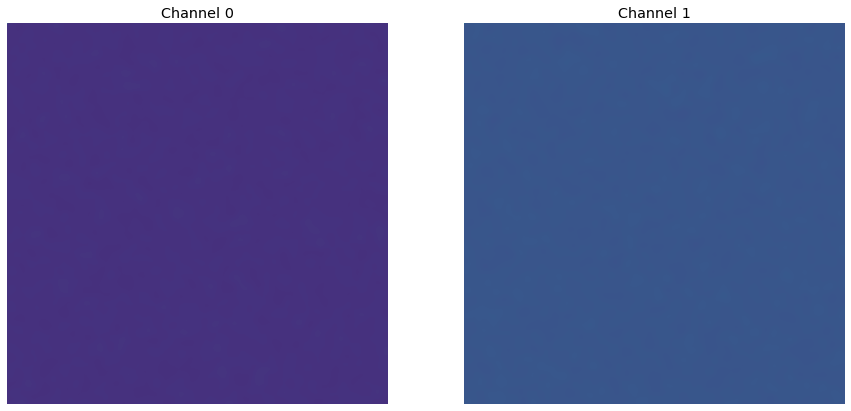

In [7]:
z_position = -14
y_position =  1200
x_position = 1000
x_size = 960
y_size = 960
simulated_image, dataframe_cells_in_image = fa.MicroscopeSimulation().make_simulated_image(z_position, y_position, x_position, x_size, y_size, complete_image_size_Z_Y_X, simulation_dataframe, list_library_cells, background_pixels_library)

# Plotting
number_color_channels = simulated_image.shape[2]
fig, ax = plt.subplots(1,number_color_channels, figsize=(15, 7))
# Plotting the heatmap of a section in the image
for i in range (number_color_channels):
    simulated_image_removed_extreme_values = fa.RemoveExtrema(simulated_image[:,:,i],min_percentile=0, max_percentile=99.9).remove_outliers()  #np.max(simulated_image[:,:,:,i],axis = 0)
    simulated_image_removed_extreme_values[0,0]=300
    simulated_image_removed_extreme_values[0,1]=2000
    ax[i].imshow(simulated_image_removed_extreme_values);ax[i].set(title='Channel '+ str(i)); ax[i].axis('off');ax[i].grid(False)
    print(np.min(simulated_image_removed_extreme_values),np.max(simulated_image_removed_extreme_values))
plt.show()


In [8]:
dataframe_cells_in_image

""
